In [3]:
import pandas as pd
import pandas_utils as pu
import rdkit_mol_identifiers as rdkit_tool
from rdkit.Chem import PandasTools
from meta_constants import MetaColumns

[13:51:59] Initializing Normalizer


## Read EXCEL

In [15]:
filename = r"C:\git\msn_library\data\iocb_libraries\raw\Radim_mce_complete.xlsx"
outfile = r"C:\git\msn_library\data\iocb_libraries\Radim_mce_complete.tsv"

In [16]:
lib = pd.read_excel(filename)

In [17]:
lib

,Plate,Well,Catalog Number,compound_name,Synonyms,cas,M.Wt,Target,PathWay,Biological Activity,Saltdata,Formula,Solubility,Solvent,Batch No.,Quantity,smiles,URL,Research Area,Clinical Information
0,HYCPK56697,A03,HY-Q50247,Row234737,NaN,NaN,397.45,NaN,NaN,NaN,NaN,C17H23N3O6S,NaN,DMSO Solution,188197,10mM * 50uL,S(NCCN1CCOCC1)(=O)(=O)C1=C(OC)C=CC(=C1)N1C(=O)...,NaN,NaN,NaN
1,HYCPK56697,A04,HY-Q36553,Row124033,NaN,NaN,318.33,NaN,NaN,NaN,NaN,C18H14N4O2,NaN,DMSO Solution,204216,10mM * 50uL,C12NC3=CC=C(C)C=C3C=1NC(=O)N(/N=C/C1C=CC=CC=1)...,NaN,NaN,NaN
2,HYCPK56697,A05,HY-Q43409,Row180451,NaN,NaN,376.53,NaN,NaN,NaN,NaN,C22H36N2O3,NaN,DMSO Solution,174830,10mM * 50uL,C(COC1C=CC(CNC2CCC(C)CC2)=CC=1OCC)(=O)NC(C)(C)C,NaN,NaN,NaN
3,HYCPK56697,A06,HY-Q33952,Row104024,NaN,391898-72-9,476.52,NaN,NaN,NaN,NaN,C25H21FN4O3S,NaN,DMSO Solution,200418,10mM * 50uL,S(CC(C1C=CC=CC=1)=O)C1N(C2C=CC=CC=2OC)C(CNC(C2...,NaN,NaN,NaN
4,HYCPK56697,A07,HY-Q02827,"1-methyl-N-(4-methylcyclohexyl)-2,4-dioxo-3-[2...",NaN,NaN,462.56,NaN,NaN,NaN,NaN,C22H30N4O5S,NaN,DMSO Solution,209719,10mM * 50uL,N1(CC(=O)N2CCCC2)C(=O)C2C=C(C=CC=2N(C)C1=O)S(=...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HYCPK56712,J18,HY-G0017,N-Desmethyl imatinib,Norimatinib; Imatinib metabolite N-Desmethyl i...,404844-02-6,479.58,Drug Metabolite,Metabolic Enzyme/Protease,N-Desmethyl imatinib (Norimatinib) is a metabo...,Free Base,C28H29N7O,DMSO : 100 mg/mL (208.52 mM; Need ultrasonic),DMSO Solution,17295,10mM * 50uL,O=C(NC1=CC=C(C)C(NC2=NC(C3=CC=CN=C3)=CC=N2)=C1...,https://www.medchemexpress.com/Imatinib-metabo...,Others,No Development Reported
4996,HYCPK56712,J19,HY-14541,Olanzapine,LY170053,132539-06-1,312.43,5-HT Receptor; Adrenergic Receptor; Apoptosis;...,Apoptosis; Autophagy; GPCR/G Protein; Neuronal...,"Olanzapine (LY170053) is a selective, orally a...",Free Base,C17H20N4S,DMSO : 20 mg/mL (64.01 mM; Need ultrasonic),DMSO Solution,8959,10mM * 50uL,CC1=CC(C(N2CCN(C)CC2)=N3)=C(S1)NC4=C3C=CC=C4,https://www.medchemexpress.com/Olanzapine.html,Neurological Disease; Cancer,Launched
4997,HYCPK56712,J20,HY-Q08716,"N-tert-butyl-1'-(4,5,6,7-tetrahydro-1H-indazol...",NaN,NaN,420.55,NaN,NaN,NaN,NaN,C24H32N6O,NaN,DMSO Solution,209174,10mM * 50uL,C1(C2CCCCC=2NN=1)C(=O)N1CCC2(NCC3=CC=CC=C3N=C2...,NaN,NaN,NaN
4998,HYCPK56712,J21,HY-Q07691,Row192868,NaN,NaN,353.80,NaN,NaN,NaN,NaN,C20H16ClNO3,NaN,DMSO Solution,176497,10mM * 50uL,C12CN(COC1=C(Cl)C=C1C(=CC(=O)OC=21)C1C=CC=CC=1...,NaN,NaN,NaN


In [12]:
def correct_well_number(well:str) -> str:
  letter = well[0]
  number = int(well[1:])
  return f"{letter}{number}"


lib["well_location"] = [correct_well_number(well) for well in lib["well_location"]]

In [13]:
lib

,IDNUMBER,structure,fmla structure,mol weight structure,nHA,nHD,CLogP,nRB,nRings,PSA,compound_name,Saltdata,inchikey,smiles,ID,inchi,Source1536wWell,volume [nL],well_location,plate_id
0,P1086813,NaN,C16H18N4O2,298.34746,6,1,-1.0,3,3,69.6,2-(4-methylpiperazin-1-yl)-6-phenyl-pyrimidine...,NaN,TXZUMXIIPHZAMV-UHFFFAOYSA-N,CN1CCN(CC1)c2nc(cc(n2)c3ccccc3)C(=O)O,1,InChI=1S/C16H18N4O2/c1-19-7-9-20(10-8-19)16-17...,A1,100,A1,Peptide01
1,P0120630213,NaN,C22H24N2O3,364.44818,3,2,4.5,6,3,71.2,"methyl 3-(1H-indol-3-yl)-2-[(2,4,6-trimethylbe...",NaN,GSBPFEDNFWDEJT-UHFFFAOYSA-N,COC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)c3c(C)cc(C)cc3C,89,InChI=1S/C22H24N2O3/c1-13-9-14(2)20(15(3)10-13...,A2,100,A1,Peptide01
2,P7020554651,NaN,C20H18BrN3O3,428.28876,3,2,3.6,6,3,84.2,N-[(1S)-1-benzyl-2-[(5-methylisoxazol-3-yl)ami...,NaN,YMQJHTKRVRGXTE-KRWDZBQOSA-N,Cc1onc(NC(=O)[C@H](Cc2ccccc2)NC(=O)c3ccccc3Br)c1,177,InChI=1S/C20H18BrN3O3/c1-13-11-18(24-27-13)23-...,A3,100,A1,Peptide01
3,P1305501,NaN,C24H22N2O2,370.45514,2,2,4.6,6,4,54.1,N-[2-(1H-indol-3-yl)-2-phenyl-ethyl]-3-methoxy...,NaN,BMZZJKFKOPJMAV-UHFFFAOYSA-N,COc1cccc(c1)C(=O)NCC(c2ccccc2)c3c[nH]c4ccccc34,265,InChI=1S/C24H22N2O2/c1-28-19-11-7-10-18(14-19)...,A4,100,A1,Peptide01
4,P3644480,NaN,C12H21NO5,259.30487,5,2,0.2,4,1,87.1,2-(1-tert-butoxycarbonyl-4-hydroxy-4-piperidyl...,NaN,CTGKOZWOKCERFN-UHFFFAOYSA-N,CC(C)(C)OC(=O)N1CCC(O)(CC(=O)O)CC1,9,"InChI=1S/C12H21NO5/c1-11(2,3)18-10(16)13-6-4-1...",A5,100,A1,Peptide01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,P7119830416,NaN,C19H17NO7,371.34984,7,1,2.1,6,3,100.2,"dimethyl 2-(2,3-dihydro-1,4-benzodioxine-6-car...",NaN,TYBVMWVYXFLJHV-UHFFFAOYSA-N,COC(=O)c1ccc(C(=O)OC)c(NC(=O)c2ccc3OCCOc3c2)c1,1216,InChI=1S/C19H17NO7/c1-24-18(22)12-3-5-13(19(23...,AF34,100,G18,Peptide01
1294,P1098642,NaN,C27H24N2O6,472.50213,5,3,4.3,6,5,121.6,"rac-(2S)-3-(1H-indol-3-yl)-2-[[2-(2,3,5-trimet...",NaN,AIHRWHPASCEREG-QFIPXVFZSA-N,CC1=C(CC(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(=O)O)C...,1136,InChI=1S/C27H24N2O6/c1-13-15(3)34-23-11-24-19(...,AF37,100,G18,Peptide01
1295,P1032769,NaN,C14H14F2N6O,320.30408,6,3,1.3,5,3,87.9,"2-[[6-(3,4-difluoroanilino)-1-methyl-pyrazolo[...",NaN,QMPPAKDZBNMJEV-UHFFFAOYSA-N,Cn1ncc2c(NCCO)nc(Nc3ccc(F)c(F)c3)nc12,1224,InChI=1S/C14H14F2N6O/c1-22-13-9(7-18-22)12(17-...,AF38,100,G18,Peptide01
1296,P1158303,NaN,C25H27N3O3,417.51224,3,3,4.1,7,4,91.1,"N-[4-(3-ethyl-2,6-dioxo-3-piperidyl)phenyl]-4-...",NaN,DKIGTEGEDFZRON-UHFFFAOYSA-N,CCC1(CCC(=O)NC1=O)c2ccc(NC(=O)CCCc3c[nH]c4cccc...,1144,InChI=1S/C25H27N3O3/c1-2-25(15-14-23(30)28-24(...,AF41,100,G19,Peptide01


In [14]:
pu.save_dataframe(lib, outfile)

## Read SDF

In [2]:
filename = r"C:\git\msn_library\data\library\mce_library_all_cleaned.sdf"
outfile = r"C:\git\msn_library\data\library\mce_library_all_cleaned_subset2.sdf"

In [3]:
lib = PandasTools.LoadSDF(filename)

,Name,ID,ROMol
0,TG003,,
1,Fostemsavir,,
2,NQO1 substrate,,
3,ALK inhibitor 1,,
4,CCT007093,,
...,...,...,...
9799,1326-12-1,,
9800,9050-30-0,,
9801,37326-33-3,,
9802,Heparin lithium salt,,

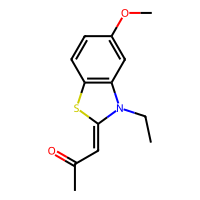
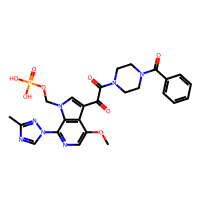
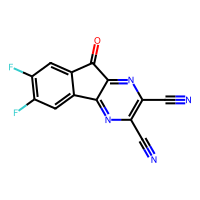
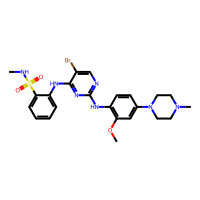
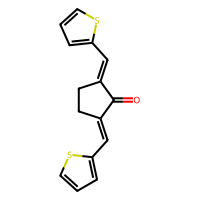
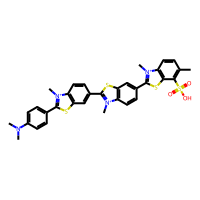
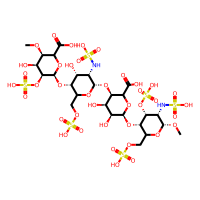
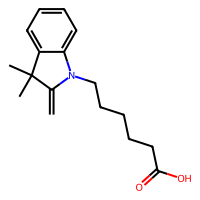
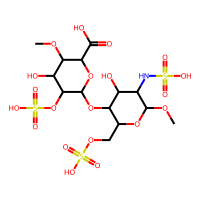
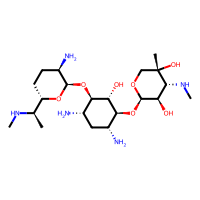

In [4]:
lib

In [5]:
lib = lib.iloc[5640:]

In [25]:
# lib = lib.rename(columns={"ROMol": "mol", "Formula": MetaColumns.formula})
lib = lib.rename(columns={"ROMol": "mol"})

In [22]:
PandasTools.WriteSDF(lib, r"C:\git\msn_library\data\library\mce_library_all_cleaned_subset2.sdf", properties=list(lib.columns))

In [14]:
lib

,Name,ID,ROMol
5640,Saikosaponin D,,<rdkit.Chem.rdchem.Mol object at 0x0000020F224...
5641,Buformin,,<rdkit.Chem.rdchem.Mol object at 0x0000020F224...
5642,HYDROXYFASUDIL,,<rdkit.Chem.rdchem.Mol object at 0x0000020F224...
5643,Elubrixin,,<rdkit.Chem.rdchem.Mol object at 0x0000020F224...
5644,cloxacillin,,<rdkit.Chem.rdchem.Mol object at 0x0000020F224...
...,...,...,...
9799,1326-12-1,,<rdkit.Chem.rdchem.Mol object at 0x0000020F285...
9800,9050-30-0,,<rdkit.Chem.rdchem.Mol object at 0x0000020F285...
9801,37326-33-3,,<rdkit.Chem.rdchem.Mol object at 0x0000020F285...
9802,Heparin lithium salt,,<rdkit.Chem.rdchem.Mol object at 0x0000020F285...


In [27]:
lib[MetaColumns.canonical_smiles] = [rdkit_tool.mol_to_canon_smiles(mol) for mol in lib["mol"]]
lib[MetaColumns.isomeric_smiles] = [rdkit_tool.mol_to_isomeric_smiles(mol) for mol in lib["mol"]]
lib[MetaColumns.monoisotopic_mass] = [rdkit_tool.exact_mass_from_mol(mol) for mol in lib["mol"]]
lib

,ID,mol,canonical_smiles,isomeric_smiles,monoisotopic_mass
0,,<rdkit.Chem.rdchem.Mol object at 0x00000234C9C...,OC(CN1CCN(c2cccc(Cl)c2)CC1)C(c1ccccc1)c1ccccc1...,OC(CN1CCN(c2cccc(Cl)c2)CC1)C(c1ccccc1)c1ccccc1...,421.204118
1,,<rdkit.Chem.rdchem.Mol object at 0x00000234C9C...,[CH2+][CH]N(CCNc1cccc(Cl)c1)CC(O)C(c1ccccc1)c1...,[CH2+][CH]N(CCNc1cccc(Cl)c1)CC(O)C(c1ccccc1)c1...,406.180643
2,,<rdkit.Chem.rdchem.Mol object at 0x00000234C9C...,[CH2+]CN(CCNCC(O)C(c1ccccc1)c1ccccc1)c1[c]c(Cl...,[CH2+]CN(CCNCC(O)C(c1ccccc1)c1ccccc1)c1[c]c(Cl...,406.180643
3,,<rdkit.Chem.rdchem.Mol object at 0x00000234C9C...,[CH2+]CN(CCNCC(O)C(c1ccccc1)c1ccccc1)c1[c]ccc(...,[CH2+]CN(CCNCC(O)C(c1ccccc1)c1ccccc1)c1[c]ccc(...,406.180643
4,,<rdkit.Chem.rdchem.Mol object at 0x00000234C9C...,[CH2+]CN(CC[N]CC(O)C(c1ccccc1)c1ccccc1)c1cccc(...,[CH2+]CN(CC[N]CC(O)C(c1ccccc1)c1ccccc1)c1cccc(...,406.180643
...,...,...,...,...,...
7264,,<rdkit.Chem.rdchem.Mol object at 0x00000234D4D...,C[OH2+],C[OH2+],33.033491
7265,,<rdkit.Chem.rdchem.Mol object at 0x00000234D4D...,[CH2][NH3+],[CH2][NH3+],31.041651
7266,,<rdkit.Chem.rdchem.Mol object at 0x00000234D4D...,C=[OH+],C=[OH+],31.017841
7267,,<rdkit.Chem.rdchem.Mol object at 0x00000234D4D...,C=[NH2+],C=[NH2+],30.033826


In [11]:
pu.save_dataframe(lib, outfile)